In [1]:
import overpy

# Сбор данных

In [ ]:
def get_schools_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    # Запрос к Overpass API для поиска зданий школ в заданном радиусе от координат
    query = f"""
        way["amenity"="school"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        (._;>;);
        out body;
    """
    result = api.query(query)
    
    nearby_schools = []
    for way in result.ways:
        nodes = way.get_nodes()
        coords = [(node.lat, node.lon) for node in nodes]
        centroid_lat = sum(node.lat for node in nodes) / len(nodes)
        centroid_lon = sum(node.lon for node in nodes) / len(nodes)
        if haversine((latitude, longitude), (centroid_lat, centroid_lon)) <= radius_meters:
            nearby_schools.append(coords)

    return nearby_schools

def get_cafes_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    query = f"""
        node["amenity"="cafe"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        out body;
    """
    result = api.query(query)
    nearby_cafes = [cafe for cafe in result.nodes if haversine((latitude, longitude), (cafe.lat, cafe.lon)) <= radius_meters]
    return nearby_cafes

def cafe_timing_type(opening_hours):
    if not opening_hours:
        return 'unknown'
    if "18:00" in opening_hours or "17:" in opening_hours or "16:" in opening_hours:
        return 'day'
    if "19:00" in opening_hours or "20:00" in opening_hours or "21:00" in opening_hours or "22:00" in opening_hours:
        return 'night'
    return 'unknown'

cafes = get_cafes_nearby(latitude, longitude, radius_meters)
schools = get_schools_nearby(latitude, longitude, radius_meters)

m = folium.Map(location=[latitude, longitude], zoom_start=13)

# Добавление маркеров кафе на карту
for cafe in cafes:
    timing = cafe_timing_type(cafe.tags.get("opening_hours", ""))
    if timing == "day":
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='green')).add_to(m)
    elif timing == "night":
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='red')).add_to(m)
    else:
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='purple')).add_to(m)

# Добавление границ зданий школ на карту зеленым цветом
for school in schools:
    folium.Polygon(locations=school, color='green', fill=True, fill_color='green').add_to(m)

m.save('cafes_and_schools_map.html')


In [ ]:
def get_parks_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    # Запрос к Overpass API для поиска парков в заданном радиусе от координат
    query = f"""
        way["leisure"="park"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        (._;>;);
        out body;
    """
    result = api.query(query)
    
    nearby_parks = []
    for way in result.ways:
        nodes = way.get_nodes()
        coords = [(node.lat, node.lon) for node in nodes]
        centroid_lat = sum(node.lat for node in nodes) / len(nodes)
        centroid_lon = sum(node.lon for node in nodes) / len(nodes)
        if haversine((latitude, longitude), (centroid_lat, centroid_lon)) <= radius_meters:
            nearby_parks.append(coords)

    return nearby_parks

def get_bike_paths_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    # Запрос к Overpass API для поиска велодорожек в заданном радиусе от координат
    query = f"""
        way["highway"="cycleway"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        (._;>;);
        out body;
    """
    result = api.query(query)
    
    nearby_bike_paths = []
    for way in result.ways:
        nodes = way.get_nodes()
        coords = [(node.lat, node.lon) for node in nodes]
        nearby_bike_paths.append(coords)

    return nearby_bike_paths

def get_schools_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    # Запрос к Overpass API для поиска зданий школ в заданном радиусе от координат
    query = f"""
        way["amenity"="school"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        (._;>;);
        out body;
    """
    result = api.query(query)
    
    nearby_schools = []
    for way in result.ways:
        nodes = way.get_nodes()
        coords = [(node.lat, node.lon) for node in nodes]
        centroid_lat = sum(node.lat for node in nodes) / len(nodes)
        centroid_lon = sum(node.lon for node in nodes) / len(nodes)
        if haversine((latitude, longitude), (centroid_lat, centroid_lon)) <= radius_meters:
            nearby_schools.append(coords)

    return nearby_schools

def get_cafes_nearby(latitude, longitude, radius_meters):
    api = overpy.Overpass()
    query = f"""
        node["amenity"="cafe"]
            ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
        out body;
    """
    result = api.query(query)
    nearby_cafes = [cafe for cafe in result.nodes if haversine((latitude, longitude), (cafe.lat, cafe.lon)) <= radius_meters]
    return nearby_cafes

def cafe_timing_type(opening_hours):
    if not opening_hours:
        return 'unknown'
    if "18:00" in opening_hours or "17:" in opening_hours or "16:" in opening_hours:
        return 'day'
    if "19:00" in opening_hours or "20:00" in opening_hours or "21:00" in opening_hours or "22:00" in opening_hours:
        return 'night'
    return 'unknown'
cafes = get_cafes_nearby(latitude, longitude, radius_meters)
schools = get_schools_nearby(latitude, longitude, radius_meters)
parks = get_parks_nearby(latitude, longitude, radius_meters)
bike_paths = get_bike_paths_nearby(latitude, longitude, radius_meters)

m = folium.Map(location=[latitude, longitude], zoom_start=13)

# Добавление маркеров кафе на карту
for cafe in cafes:
    timing = cafe_timing_type(cafe.tags.get("opening_hours", ""))
    if timing == "day":
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='green')).add_to(m)
    elif timing == "night":
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='red')).add_to(m)
    else:
        folium.Marker([cafe.lat, cafe.lon], icon=folium.Icon(color='purple')).add_to(m)

# Добавление границ зданий школ на карту зеленым цветом
for school in schools:
    folium.Polygon(locations=school, color='green', fill=True, fill_color='green').add_to(m)

# Добавление границ парков на карту оранжевым цветом
for park in parks:
    folium.Polygon(locations=park, color='orange', fill=True, fill_color='orange').add_to(m)

# Добавление границ велодорожек на карту красным цветом
for bike_path in bike_paths:
    folium.PolyLine(locations=bike_path, color='red').add_to(m)

m.save('map_with_features.html')


In [1]:
objects_list_org = [
'amenity=university',
'building=university',
'building=college',
'amenity=college',
'amenity=school',
'building=school',
'amenity=kindergarten',
'building=kindergarten',
'amenity=language_school',
'amenity=music_school',
'leisure=swimming_pool',
'building=stadium',
'building=riding_hall',
'leisure=fitness_centre',
'building=sports_hall',
'cycleway=*',
'leisure=ice_rink',
'leisure=park',
'highway=footway',
'leisure=pitch',
'leisure=sports_centre',
'leisure=stadium',
'leisure=track',
'amenity=marketplace',
'shop=greengrocer',
'shop=farm',
'shop=e-cigarette',
'shop=tobacco ',
'amenity=bar',
'amenity=biergarten',
'amenity=pub',
'shop=alcohol',
'shop=beverages',
'amenity=fast_food',
'amenity=food_court',
'leisure=park',
'leisure=resort',
'leisure=nature_reserve',
'highway=pedestrian',
'highway=footway',
'leisure=track',
'highway=cycleway',
'cycleway=*',
'building=sports_hall',
'leisure=sports_hall',
'leisure=sports_centre',
'leisure=fitness_station',
'leisure=stadium',
'leisure=fitness_centre',
'leisure=pitch',
'leisure=dance',
'leisure=ice_rink',
'leisure=swimming_pool',
'leisure=swimming_area',
'leisure=sauna',
'leisure=amusement_arcade',
'leisure=adult_gaming_centre',
'leisure=water_park',
'amenity=arts_centre',
'amenity=cinema',
'amenity=community_centre',
'amenity=conference_centre',
'amenity=exhibition_centre',
'amenity=music_venue',
'amenity=planetarium',
'amenity=social_centre',
'amenity=theatre',
'building=museum',
'building=stadium',
'building=civic',
'building=cathedral',
'building=chapel',
'building=church',
'building=mosque',
'building=religious',
'building=synagogue',
'building=temple',
'amenity=library',
'amenity=bar',
'amenity=biergarten',
'amenity=fast_food',
'amenity=ice_cream',
'amenity=pub',
'amenity=cafe',
'amenity=food_court',
'amenity=restaurant',
'amenity=kindergarten',
'building=kindergarten',
'building=college',
'amenity=college',
'amenity=language_school',
'amenity=dancing_school',
'amenity=driving_school',
'amenity=music_school',
'amenity=school',
'building=school',
'amenity=university',
'building=university',
'amenity=training',
'building=hospital',
'amenity=clinic',
'amenity=dentist',
'amenity=doctors',
'amenity=hospital',
'amenity=nursing_home',
'amenity=pharmacy',
'amenity=social_facility',
'emergency=ambulance_station',
'building=dormitory',
'amenity=research_institute',
'amenity=courthouse',
'amenity=fire_station',
'amenity=police',
'amenity=post_office',
'amenity=townhall',
'building=government',
'amenity=gambling',
'amenity=nightclub',
'amenity=stripclub',
'amenity=prison',
'highway=bus_guideway',
'highway=bus_stop',
'amenity=taxi',
'railway=platform',
'public_transport=station',
'railway=station',
'railway=subway_entrance',
'railway=tram_stop',
'public_transport=stop_position',
'public_transport=platform',
'highway=street_lamp',
'highway=traffic_signals',
'highway=crossing',
'amenity=bbq',
'amenity=bench',
'amenity=dressing_room',
'amenity=drinking_water',
'amenity=toilets',
'amenity=water_point',
'amenity=waste_disposal',
'amenity=waste_basket',
'amenity=recycling',
'amenity=sanitary_dump_station',
'amenity=waste_transfer_station',
'building=train_station',
'building=transportation',
'railway=*',
'railway=rail',
'bridge=yes',
'cutting=yes',
'embankment=yes',
'landuse=railway',
'highway=trunk',
'highway=primary',
'highway=secondary',
'highway=tertiary',
'highway=motorway',
'highway=unclassified',
'highway=residential',
'highway=living_street',
'building=parking',
'building=garages',
'building=garage',
'aeroway=aerodrome',
'building=industrial',
'building=barn',
'building=service',
'building=transformer_tower',
'building=warehouse',
'building=hangar',
'electrified=contact_line',
'power=cable',
'power=generator',
'power=line',
'line=busbar',
'power=switchgear',
'power=transformer',
'power=plant',
'shop=deli',
'shop=dairy',
'shop=farm',
'shop=greengrocer',
'shop=health_food',
'shop=seafood',
'shop=water',
'shop=food',
'shop=supermarket',
'shop=mall',
'shop=general',
'shop=bicycle',
'shop=outdoor',
'shop=sports',
'shop=books',
'shop=alcohol',
'shop=tobacco',
'shop=beverages',
'shop=convenience',
'shop=frozen_food',
'shop=ice_cream',
'shop=kiosk',
'building=kiosk',
'shop=money_lender',
'shop=car_repair',
'shop=wholesale',
'landuse=construction',
'landuse=industrial',
'landuse=brownfield',
'landuse=cemetery',
'landuse=garages',
'landuse=landfill',
'landuse=greenfield',
'landuse=quarry',
'landuse=railway',
'landuse=recreation_ground',
'landuse=village_green',
'landuse=winter_sports'
]


In [151]:
objects_list_org = [
"amenity=university",
"building=university",
"building=college",
"amenity=college",
"amenity=school",
"building=school",
"amenity=kindergarten",
"building=kindergarten",
"amenity=language_school",
"amenity=music_school",
"leisure=swimming_pool",
"building=stadium",
"building=riding_hall",
"leisure=fitness_centre",
"building=sports_hall",
"cycleway=*",
"leisure=ice_rink",
"leisure=park",
"highway=footway",
"leisure=pitch",
"leisure=sports_centre",
"leisure=stadium",
"leisure=track",
"amenity=marketplace",
"shop=greengrocer",
"shop=farm",
"shop=e-cigarette",
"shop=tobacco",
"amenity=bar",
"amenity=biergarten",
"amenity=pub",
"shop=alcohol",
"shop=beverages",
"amenity=fast_food",
"amenity=food_court",
"shop=frozen_food",
"landuse=industrial",
"landuse=brownfield",
"building=parking",
"building=warehouse",
"shop=wholesale",
"amenity=nightclub",
"shop=bicycle",
"shop=sports",
"shop=outdoor",
"shop=seafood",
"leisure=track",
"landuse=recreation_ground",
"highway=bus_stop",
"highway=street_lamp",
"amenity=waste_basket",
"amenity=toilets",
"amenity=water_point",
"military=*",
"tourism=*"
]

In [152]:
tags_dict = {}
for tag in objects_list_org:
    key, value = tag.split("=")
    if key in tags_dict:
        tags_dict[key].append(value)
    else:
        tags_dict[key] = [value]


In [4]:
import pandas as pd
df = pd.read_excel('3.xlsx')

In [5]:
import overpy
import pandas as pd
from tqdm import tqdm
def save_to_excel():
    df.to_excel("4.xlsx", index=False)

def count_amenities_nearby(df, radius_meters=25000):
    api = overpy.Overpass()
    R = 6371000  # Радиус Земли в метрах

    def haversine(coord1, coord2):
        import math
        lat1, lon1 = map(math.radians, coord1)
        lat2, lon2 = map(math.radians, coord2)
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        return R * c

    for key, values in tags_dict.items():
        for value in values:
            column_name = f"{key}_{value}"
            df[column_name] = 0  # Создаем новую колонку со значением 0

    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing coordinates"):
        latitude, longitude = row['latitude'], row['longitude']
        for key, values in tags_dict.items():
            for value in tqdm(values, desc=f"Processing {key}", leave=False, position=1):
                column_name = f"{key}_{value}"
                query = f"""
                    node["{key}"="{value}"]
                        ({latitude - 0.03},{longitude - 0.03},{latitude + 0.03},{longitude + 0.03});
                    out;
                """
                result = api.query(query)
                nearby_amenities = [amenity for amenity in result.nodes if haversine((latitude, longitude), (amenity.lat, amenity.lon)) <= radius_meters]
                df.at[index, column_name] = len(nearby_amenities)
        save_to_excel()
        print(index)
    return df

# Пример использования:
# data = {
#     'longitude': [53.67459837],
#     'latitude': [53.67852408]
# }
# df = pd.DataFrame(data)
result_df = count_amenities_nearby(df)
print(result_df)


Processing coordinates:   0%|          | 0/152 [00:00<?, ?it/s]

Processing coordinates:   1%|          | 1/152 [00:28<1:11:39, 28.48s/it]

0


Processing coordinates:   1%|▏         | 2/152 [00:57<1:12:31, 29.01s/it]

1


Processing coordinates:   2%|▏         | 3/152 [01:26<1:11:12, 28.67s/it]

2


Processing coordinates:   3%|▎         | 4/152 [01:54<1:10:20, 28.52s/it]

3


Processing coordinates:   3%|▎         | 5/152 [02:23<1:10:11, 28.65s/it]

4


Processing coordinates:   4%|▍         | 6/152 [02:51<1:09:23, 28.52s/it]

5


Processing coordinates:   5%|▍         | 7/152 [03:19<1:08:51, 28.49s/it]

6


Processing coordinates:   5%|▌         | 8/152 [03:48<1:08:16, 28.44s/it]

7


Processing coordinates:   6%|▌         | 9/152 [04:17<1:08:35, 28.78s/it]

8


Processing coordinates:   7%|▋         | 10/152 [04:46<1:07:50, 28.67s/it]

9


Processing coordinates:   7%|▋         | 11/152 [05:15<1:07:46, 28.84s/it]

10


Processing coordinates:   8%|▊         | 12/152 [05:44<1:07:04, 28.75s/it]

11


Processing coordinates:   9%|▊         | 13/152 [06:13<1:07:25, 29.10s/it]

12


Processing coordinates:   9%|▉         | 14/152 [06:42<1:06:20, 28.84s/it]

13


Processing coordinates:  10%|▉         | 15/152 [07:10<1:05:24, 28.65s/it]

14


Processing coordinates:  11%|█         | 16/152 [07:38<1:04:44, 28.56s/it]

15


Processing coordinates:  11%|█         | 17/152 [08:07<1:04:12, 28.53s/it]

16


Processing coordinates:  12%|█▏        | 18/152 [08:35<1:03:33, 28.46s/it]

17


Processing coordinates:  12%|█▎        | 19/152 [09:03<1:03:02, 28.44s/it]

18


Processing coordinates:  13%|█▎        | 20/152 [09:33<1:03:03, 28.66s/it]

19


Processing coordinates:  14%|█▍        | 21/152 [10:01<1:02:20, 28.55s/it]

20


Processing coordinates:  14%|█▍        | 22/152 [10:31<1:02:33, 28.88s/it]

21


Processing coordinates:  15%|█▌        | 23/152 [10:59<1:01:41, 28.69s/it]

22


Processing coordinates:  16%|█▌        | 24/152 [11:28<1:01:17, 28.73s/it]

23


Processing coordinates:  16%|█▋        | 25/152 [11:57<1:00:59, 28.81s/it]

24


Processing coordinates:  17%|█▋        | 26/152 [12:25<1:00:22, 28.75s/it]

25


Processing coordinates:  18%|█▊        | 27/152 [12:53<59:34, 28.60s/it]  

26


Processing coordinates:  18%|█▊        | 28/152 [13:22<58:50, 28.47s/it]

27


Processing coordinates:  19%|█▉        | 29/152 [13:50<58:20, 28.46s/it]

28


Processing coordinates:  20%|█▉        | 30/152 [14:19<57:52, 28.46s/it]

29


Processing coordinates:  20%|██        | 31/152 [14:47<57:34, 28.55s/it]

30


Processing coordinates:  21%|██        | 32/152 [15:16<56:55, 28.47s/it]

31


Processing coordinates:  22%|██▏       | 33/152 [15:44<56:31, 28.50s/it]

32


Processing coordinates:  22%|██▏       | 34/152 [16:12<55:56, 28.45s/it]

33


Processing coordinates:  23%|██▎       | 35/152 [16:43<56:30, 28.98s/it]

34


Processing coordinates:  24%|██▎       | 36/152 [17:11<55:33, 28.73s/it]

35


Processing coordinates:  24%|██▍       | 37/152 [17:40<55:21, 28.88s/it]

36


Processing coordinates:  25%|██▌       | 38/152 [18:09<54:56, 28.92s/it]

37


Processing coordinates:  26%|██▌       | 39/152 [18:39<54:48, 29.10s/it]

38


Processing coordinates:  26%|██▋       | 40/152 [19:07<53:50, 28.84s/it]

39


Processing coordinates:  27%|██▋       | 41/152 [19:36<53:39, 29.00s/it]

40


Processing coordinates:  28%|██▊       | 42/152 [20:05<53:12, 29.03s/it]

41


Processing coordinates:  28%|██▊       | 43/152 [20:34<52:24, 28.85s/it]

42


Processing coordinates:  29%|██▉       | 44/152 [21:02<51:43, 28.74s/it]

43


Processing coordinates:  30%|██▉       | 45/152 [21:31<51:15, 28.74s/it]

44


Processing coordinates:  30%|███       | 46/152 [21:59<50:27, 28.56s/it]

45


Processing coordinates:  31%|███       | 47/152 [22:27<49:53, 28.51s/it]

46


Processing coordinates:  32%|███▏      | 48/152 [22:57<49:41, 28.67s/it]

47


Processing coordinates:  32%|███▏      | 49/152 [23:26<49:26, 28.80s/it]

48


Processing coordinates:  33%|███▎      | 50/152 [23:55<49:21, 29.03s/it]

49


Processing coordinates:  34%|███▎      | 51/152 [24:23<48:25, 28.77s/it]

50


Processing coordinates:  34%|███▍      | 52/152 [24:52<47:45, 28.66s/it]

51


Processing coordinates:  35%|███▍      | 53/152 [25:20<47:05, 28.54s/it]

52


Processing coordinates:  36%|███▌      | 54/152 [25:48<46:31, 28.48s/it]

53


Processing coordinates:  36%|███▌      | 55/152 [26:17<46:03, 28.49s/it]

54


Processing coordinates:  37%|███▋      | 56/152 [26:45<45:34, 28.48s/it]

55


Processing coordinates:  38%|███▊      | 57/152 [27:15<45:46, 28.91s/it]

56


Processing coordinates:  38%|███▊      | 58/152 [27:45<45:46, 29.21s/it]

57


Processing coordinates:  39%|███▉      | 59/152 [28:14<45:10, 29.15s/it]

58


Processing coordinates:  39%|███▉      | 60/152 [28:43<44:37, 29.11s/it]

59


Processing coordinates:  40%|████      | 61/152 [29:11<43:45, 28.85s/it]

60


Processing coordinates:  41%|████      | 62/152 [29:40<43:05, 28.73s/it]

61


Processing coordinates:  41%|████▏     | 63/152 [30:09<42:40, 28.77s/it]

62


Processing coordinates:  42%|████▏     | 64/152 [30:37<42:00, 28.64s/it]

63


Processing coordinates:  43%|████▎     | 65/152 [31:06<41:48, 28.83s/it]

64


Processing coordinates:  43%|████▎     | 66/152 [31:35<41:13, 28.76s/it]

65


Processing coordinates:  44%|████▍     | 67/152 [32:05<41:04, 29.00s/it]

66


Processing coordinates:  45%|████▍     | 68/152 [32:33<40:29, 28.92s/it]

67


Processing coordinates:  45%|████▌     | 69/152 [33:02<39:47, 28.76s/it]

68


Processing coordinates:  46%|████▌     | 70/152 [33:30<39:17, 28.75s/it]

69


Processing coordinates:  47%|████▋     | 71/152 [33:58<38:33, 28.56s/it]

70


Processing coordinates:  47%|████▋     | 72/152 [34:28<38:19, 28.74s/it]

71


Processing coordinates:  48%|████▊     | 73/152 [34:56<37:42, 28.64s/it]

72


Processing coordinates:  49%|████▊     | 74/152 [35:25<37:19, 28.72s/it]

73


Processing coordinates:  49%|████▉     | 75/152 [35:54<36:47, 28.67s/it]

74


Processing coordinates:  50%|█████     | 76/152 [36:22<36:22, 28.72s/it]

75


Processing coordinates:  51%|█████     | 77/152 [36:50<35:38, 28.52s/it]

76


Processing coordinates:  51%|█████▏    | 78/152 [37:21<35:53, 29.11s/it]

77


Processing coordinates:  52%|█████▏    | 79/152 [37:49<35:05, 28.85s/it]

78


Processing coordinates:  53%|█████▎    | 80/152 [38:18<34:39, 28.88s/it]

79


Processing coordinates:  53%|█████▎    | 81/152 [38:46<34:00, 28.73s/it]

80


Processing coordinates:  54%|█████▍    | 82/152 [39:15<33:23, 28.62s/it]

81


Processing coordinates:  55%|█████▍    | 83/152 [39:43<32:47, 28.51s/it]

82


Processing coordinates:  55%|█████▌    | 84/152 [40:12<32:19, 28.52s/it]

83


Processing coordinates:  56%|█████▌    | 85/152 [40:40<31:44, 28.42s/it]

84


Processing coordinates:  57%|█████▋    | 86/152 [41:09<31:26, 28.59s/it]

85


Processing coordinates:  57%|█████▋    | 87/152 [41:38<31:10, 28.78s/it]

86


Processing coordinates:  58%|█████▊    | 88/152 [42:06<30:32, 28.63s/it]

87


Processing coordinates:  59%|█████▊    | 89/152 [42:35<30:10, 28.75s/it]

88


Processing coordinates:  59%|█████▉    | 90/152 [43:04<29:36, 28.65s/it]

89


Processing coordinates:  60%|█████▉    | 91/152 [43:33<29:14, 28.76s/it]

90


Processing coordinates:  61%|██████    | 92/152 [44:01<28:37, 28.63s/it]

91


Processing coordinates:  61%|██████    | 93/152 [44:30<28:21, 28.85s/it]

92


Processing coordinates:  62%|██████▏   | 94/152 [44:59<27:42, 28.66s/it]

93


Processing coordinates:  62%|██████▎   | 95/152 [45:27<27:11, 28.62s/it]

94


Processing coordinates:  63%|██████▎   | 96/152 [45:56<26:38, 28.54s/it]

95


Processing coordinates:  64%|██████▍   | 97/152 [46:24<26:09, 28.53s/it]

96


Processing coordinates:  64%|██████▍   | 98/152 [46:53<25:41, 28.55s/it]

97


Processing coordinates:  65%|██████▌   | 99/152 [47:23<25:47, 29.21s/it]

98


Processing coordinates:  66%|██████▌   | 100/152 [47:52<25:11, 29.06s/it]

99


Processing coordinates:  66%|██████▋   | 101/152 [48:22<24:54, 29.29s/it]

100


Processing coordinates:  67%|██████▋   | 102/152 [48:50<24:10, 29.01s/it]

101


Processing coordinates:  68%|██████▊   | 103/152 [49:20<23:52, 29.23s/it]

102


Processing coordinates:  68%|██████▊   | 104/152 [49:48<23:10, 28.97s/it]

103


Processing coordinates:  69%|██████▉   | 105/152 [50:17<22:40, 28.95s/it]

104


Processing coordinates:  70%|██████▉   | 106/152 [50:47<22:16, 29.06s/it]

105


Processing coordinates:  70%|███████   | 107/152 [51:16<21:55, 29.24s/it]

106


Processing coordinates:  71%|███████   | 108/152 [51:45<21:20, 29.11s/it]

107


Processing coordinates:  72%|███████▏  | 109/152 [52:14<20:43, 28.92s/it]

108


Processing coordinates:  72%|███████▏  | 110/152 [52:42<20:07, 28.75s/it]

109


Processing coordinates:  73%|███████▎  | 111/152 [53:10<19:35, 28.68s/it]

110


Processing coordinates:  74%|███████▎  | 112/152 [53:39<19:08, 28.72s/it]

111


Processing coordinates:  74%|███████▍  | 113/152 [54:08<18:35, 28.60s/it]

112


Processing coordinates:  75%|███████▌  | 114/152 [54:38<18:23, 29.05s/it]

113


Processing coordinates:  76%|███████▌  | 115/152 [55:06<17:49, 28.89s/it]

114


Processing coordinates:  76%|███████▋  | 116/152 [55:35<17:22, 28.95s/it]

115


Processing coordinates:  77%|███████▋  | 117/152 [56:04<16:51, 28.91s/it]

116


Processing coordinates:  78%|███████▊  | 118/152 [56:32<16:17, 28.74s/it]

117


Processing coordinates:  78%|███████▊  | 119/152 [57:01<15:47, 28.71s/it]

118


Processing coordinates:  79%|███████▉  | 120/152 [57:30<15:16, 28.65s/it]

119


Processing coordinates:  80%|███████▉  | 121/152 [57:58<14:44, 28.55s/it]

120


Processing coordinates:  80%|████████  | 122/152 [58:26<14:15, 28.50s/it]

121


Processing coordinates:  81%|████████  | 123/152 [58:56<13:57, 28.90s/it]

122


Processing coordinates:  82%|████████▏ | 124/152 [59:24<13:23, 28.71s/it]

123


Processing coordinates:  82%|████████▏ | 125/152 [59:54<13:01, 28.93s/it]

124


Processing coordinates:  83%|████████▎ | 126/152 [1:00:22<12:27, 28.74s/it]

125


Processing coordinates:  84%|████████▎ | 127/152 [1:00:51<11:57, 28.71s/it]

126


Processing coordinates:  84%|████████▍ | 128/152 [1:01:19<11:26, 28.61s/it]

127


Processing coordinates:  85%|████████▍ | 129/152 [1:01:48<10:57, 28.58s/it]

128


Processing coordinates:  86%|████████▌ | 130/152 [1:02:16<10:29, 28.60s/it]

129


Processing coordinates:  86%|████████▌ | 131/152 [1:02:45<09:59, 28.55s/it]

130


Processing coordinates:  87%|████████▋ | 132/152 [1:03:14<09:36, 28.82s/it]

131


Processing coordinates:  88%|████████▊ | 133/152 [1:03:44<09:11, 29.02s/it]

132


Processing coordinates:  88%|████████▊ | 134/152 [1:04:12<08:40, 28.92s/it]

133


Processing coordinates:  89%|████████▉ | 135/152 [1:04:41<08:09, 28.81s/it]

134


Processing coordinates:  89%|████████▉ | 136/152 [1:05:10<07:41, 28.82s/it]

135


Processing coordinates:  90%|█████████ | 137/152 [1:05:39<07:13, 28.90s/it]

136


Processing coordinates:  91%|█████████ | 138/152 [1:06:08<06:44, 28.88s/it]

137


Processing coordinates:  91%|█████████▏| 139/152 [1:06:36<06:13, 28.73s/it]

138


Processing coordinates:  92%|█████████▏| 140/152 [1:07:05<05:46, 28.84s/it]

139


Processing coordinates:  93%|█████████▎| 141/152 [1:07:33<05:15, 28.68s/it]

140


Processing coordinates:  93%|█████████▎| 142/152 [1:08:02<04:46, 28.67s/it]

141


Processing coordinates:  94%|█████████▍| 143/152 [1:08:32<04:21, 29.07s/it]

142


Processing coordinates:  95%|█████████▍| 144/152 [1:09:01<03:51, 28.88s/it]

143


Processing coordinates:  95%|█████████▌| 145/152 [1:09:30<03:22, 28.99s/it]

144


Processing coordinates:  96%|█████████▌| 146/152 [1:09:59<02:54, 29.04s/it]

145


Processing coordinates:  97%|█████████▋| 147/152 [1:10:28<02:25, 29.00s/it]

146


Processing coordinates:  97%|█████████▋| 148/152 [1:10:56<01:55, 28.84s/it]

147


Processing coordinates:  98%|█████████▊| 149/152 [1:11:25<01:26, 28.72s/it]

148


Processing coordinates:  99%|█████████▊| 150/152 [1:11:54<00:57, 28.86s/it]

149


Processing coordinates:  99%|█████████▉| 151/152 [1:12:23<00:28, 28.94s/it]

150


Processing coordinates: 100%|██████████| 152/152 [1:12:52<00:00, 28.76s/it]

151
     Unnamed: 0    id  region_id          name   longitude   latitude  \
0           917  8803        573        Абакан   91.438757  53.694009   
1            18  7844        593       Анадырь  177.416588  64.719611   
2           933  8820        527       Ангарск  103.896661  52.506932   
3           864  8745        544       Арзамас   43.839646  55.396491   
4           921  8807        534       Армавир   41.098974  44.999168   
..          ...   ...        ...           ...         ...        ...   
147         909  8795        541  Электросталь   38.453257  55.785084   
148         863  8744        561        Элиста   44.256793  46.314798   
149         931  8818        579       Энгельс   46.104818  51.476159   
150        1106  8841        568        Якутск  129.707897  62.046048   
151         990  8881        595     Ярославль   39.855049  57.633697   

     people_count  group_id                        climate  house_points  ...  \
0           187.1        47      услов

# Отрисовка карты

In [2]:
def convert_to_dict(tags_list):
    return [dict([tag.split('=')]) for tag in tags_list]
yellow_objects = [
    "amenity=university", "building=university", "building=college", "amenity=college", "amenity=school",
    "building=school", "amenity=kindergarten", "building=kindergarten", "amenity=language_school", "amenity=music_school"
]
green_objects = [
    "leisure=swimming_pool", "building=stadium", "building=riding_hall", "leisure=fitness_centre", 
    "building=sports_hall", "cycleway=*", "leisure=ice_rink", "leisure=park", "highway=footway", 
    "leisure=pitch", "leisure=sports_centre", "leisure=stadium", "leisure=track", "amenity=marketplace",
    "shop=greengrocer", "shop=farm"
]
red_objects = [
    "shop=e-cigarette", "shop=tobacco", "amenity=bar", "amenity=biergarten", "amenity=pub", 
    "shop=alcohol", "shop=beverages", "amenity=fast_food", "amenity=food_court"
]

yellow_dict = convert_to_dict(yellow_objects)
green_dict = convert_to_dict(green_objects)
red_dict = convert_to_dict(red_objects)

print(yellow_dict)
print(green_dict)
print(red_dict)

[{'amenity': 'university'}, {'building': 'university'}, {'building': 'college'}, {'amenity': 'college'}, {'amenity': 'school'}, {'building': 'school'}, {'amenity': 'kindergarten'}, {'building': 'kindergarten'}, {'amenity': 'language_school'}, {'amenity': 'music_school'}]
[{'leisure': 'swimming_pool'}, {'building': 'stadium'}, {'building': 'riding_hall'}, {'leisure': 'fitness_centre'}, {'building': 'sports_hall'}, {'cycleway': '*'}, {'leisure': 'ice_rink'}, {'leisure': 'park'}, {'highway': 'footway'}, {'leisure': 'pitch'}, {'leisure': 'sports_centre'}, {'leisure': 'stadium'}, {'leisure': 'track'}, {'amenity': 'marketplace'}, {'shop': 'greengrocer'}, {'shop': 'farm'}]
[{'shop': 'e-cigarette'}, {'shop': 'tobacco'}, {'amenity': 'bar'}, {'amenity': 'biergarten'}, {'amenity': 'pub'}, {'shop': 'alcohol'}, {'shop': 'beverages'}, {'amenity': 'fast_food'}, {'amenity': 'food_court'}]


In [8]:
descriptions_dict = {
"amenity - bar": "<b>Бар, общественное питание</b><br><span style='color: red'>Негативное влияние - продажа алкогольных напитков</span>",
    "amenity - biergarten": "<b>Паб, общественное питание</b><br><span style='color: red'>Негативное влияние - продажа алкогольных напитков</span>",
    "amenity - college": "<b>Колледж, техникум </b><br><span style='color: darkyellow'>Учебное заведение </span>",
    "amenity - fast_food": "<b>Общественное питание, фаст-фуд</b><br><span style='color: red'>Негативное влияние - изменение баланса основных нутриентов </span>",
    "amenity - food_court": "<b>Общественное питание, фуд-корт</b><br><span style='color: red'>Негативное влияние - изменение баланса основных нутриентов </span>",
    "amenity - kindergarten": "<b>Детский сад</b><br><span style='color: darkyellow'>Детское дошкольное учреждение</span>",
    "amenity - language_school": "<b>Языковая школа</b><br><span style='color: darkyellow'>Учреждение дополнительного образования</span>",
    "amenity - marketplace": "<b>Рынок</b><br><span style='color: darkyellow'>Рынок, базар или иная торговая площадка</span>",
    "amenity - music_school": "<b>Музыкальная школа</b><br><span style='color: darkyellow'>Учреждение дополнительного образования</span>",
    "amenity - pub": "<b>Паб, общественное питание</b><br><span style='color: red'>Негативное влияние - продажа алкогольных напитков</span>",
    "amenity - school": "<b>Школа</b><br><span style='color: darkyellow'>Учебное заведение</span>",
    "amenity - university": "<b>Университет</b><br><span style='color: darkyellow'>Учебное заведение</span>",
    "leisure - fitness_centre": "<b>Фитнесс-центр</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом</span>",
  "leisure - ice_rink": "<b>Каток</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом и активного отдыха</span>",
  "leisure - park": "<b>Парк</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом и активного отдыха</span>",
  "leisure - pitch": "<b>Спортивная площадка</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом</span>",
    "leisure - sports_centre": "<b>Спортивный центр</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом</span>",
  #  leisure - sports_centre
    "leisure - stadium": "<b>Стадион</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом</span>",
    "leisure - swimming_pool": "<b>Бассейн</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом</span>",
    "leisure - track": "<b>Спортивная дорожка</b><br><span style='color: darkyellow'>Положительное влияние - место занятий спортом (бега, велосипеда)</span>",
    "shop - alcohol": "<b>Алкогольный магазин</b><br><span style='color: red'>Негативное влияние - продажа алкогольных напитков</span>",
    "shop - beverages": "<b>Магазин напитков</b><br><span style='color: red'>Негативное влияние - продажа напитков, в том числе алкогольных</span>",
    "shop - e-cigarette": "<b> Магазин электронных сигарет</b><br><span style='color: red'>Негативное влияние - продажа электронных сигарет и комплектующих к ним</span>",
    "shop - farm": "<b>Натуральные продукты</b><br><span style='color: darkyellow'>Положительное влияние - место продажи натуральных фермерских продуктов</span>",
    "shop - greengrocer": "<b>Свежие фрукты и овощи</b><br><span style='color: darkyellow'>Положительное влияние - место продажи свежих фруктов и овощей</span>",
    "shop - tobacco": "<b>Табачный магазин</b><br><span style='color: red'>Негативное влияние - продажа табачной продукции</span>",

}

In [22]:
import pandas as pd
data2 = pd.read_excel('5.xlsx')
data2

,Unnamed: 0,id,region_id,name,longitude,latitude,people_count,group_id,climate,house_points,...,amenity - biergarten_park,amenity - pub_park,amenity - fast_food_park,amenity - food_court_park,shop - e-cigarette_park,shop - tobacco_park,shop - alcohol_park,shop - beverages_park,total_sum_neg_park,total_sum_neg_park_1000
0,917,8803,573,Абакан,91.438757,53.694009,187.1,47,условно комфортный климат,38,...,0,0,0,0,0,0,0,0,0,0.0
1,18,7844,593,Анадырь,177.416588,64.719611,15.1,50,тяжелые климатические условия,52,...,0,0,0,0,0,0,0,0,0,0.0
2,933,8820,527,Ангарск,103.896661,52.506932,219.7,47,условно комфортный климат,36,...,0,0,0,0,0,0,0,0,0,0.0
3,864,8745,544,Арзамас,43.839646,55.396491,102.7,47,условно комфортный климат,33,...,0,0,0,0,0,0,0,0,0,0.0
4,921,8807,534,Армавир,41.098974,44.999168,186.1,47,условно комфортный климат,35,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,909,8795,541,Электросталь,38.453257,55.785084,149.1,47,условно комфортный климат,46,...,0,0,0,0,0,0,0,0,0,0.0
148,863,8744,561,Элиста,44.256793,46.314798,103.5,47,условно комфортный климат,34,...,0,0,0,0,0,0,0,0,0,0.0
149,931,8818,579,Энгельс,46.104818,51.476159,225.0,47,условно комфортный климат,34,...,0,0,0,0,0,0,0,0,0,0.0
150,1106,8841,568,Якутск,129.707897,62.046048,341.2,46,тяжелые климатические условия,26,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
import requests
import folium
import overpy
import math
from tqdm import tqdm

class LocationInfo:
    @staticmethod
    def haversine(coord1, coord2):
        R = 6371000  # Radius of the Earth in meters
        lat1, lon1 = map(math.radians, coord1)
        lat2, lon2 = map(math.radians, coord2)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        return R * c

    @staticmethod
    def get_city_polygon(city_name):
        url = f"https://nominatim.openstreetmap.org/search?city={city_name}&format=json&polygon_geojson=1"
        response = requests.get(url)
        data = response.json()

        for item in data:
            if item.get("geojson", {}).get("type") in ["Polygon", "MultiPolygon"]:
                return item["geojson"]
        return None

    @staticmethod
    def get_parks_nearby(latitude, longitude, radius_meters):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        query = f"""
            way["leisure"="park"]{bounds};
            (._;>;);
            out body;
        """
        result = api.query(query)

        nearby_parks = []
        for way in result.ways:
            nodes = way.get_nodes()
            coords = [(node.lat, node.lon) for node in nodes]
            centroid_lat = sum(node.lat for node in nodes) / len(nodes)
            centroid_lon = sum(node.lon for node in nodes) / len(nodes)
            if LocationInfo.haversine((latitude, longitude), (centroid_lat, centroid_lon)) <= radius_meters:
                nearby_parks.append(coords)
        return nearby_parks

    @staticmethod
    def get_cafes_nearby(latitude, longitude, radius_meters):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        query = f"""
            node["amenity"="cafe"]{bounds};
            out;
        """
        result = api.query(query)
        nearby_cafes = [cafe for cafe in result.nodes if LocationInfo.haversine((latitude, longitude), (cafe.lat, cafe.lon)) <= radius_meters]
        return nearby_cafes

    @staticmethod
    def get_city_center_coordinates(city_name):
        """Возвращает координаты центра города по его имени"""
        url = f"https://nominatim.openstreetmap.org/search?city={city_name}&format=json"
        response = requests.get(url)
        data = response.json()

        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
        return None

    @staticmethod
    def get_objects_nearby(latitude, longitude, radius_meters, obj_type):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        query = f"""
            node["{next(iter(obj_type))}"="{obj_type[next(iter(obj_type))]}"]{bounds};
            out;
        """
        result = api.query(query)
        return result.nodes


def create_map(city_name):
    latitude, longitude = LocationInfo.get_city_center_coordinates(city_name)

    # Если координаты не найдены, задаем значения по умолчанию
    if not latitude or not longitude:
        latitude, longitude = 56.8386, 60.6055

    city_polygon = LocationInfo.get_city_polygon(city_name)
    parks = LocationInfo.get_parks_nearby(latitude, longitude, radius_meters)
    cafes = LocationInfo.get_cafes_nearby(latitude, longitude, radius_meters)
    
    m = folium.Map(location=[latitude, longitude], zoom_start=10)

    # Добавляем городской полигон
    folium.GeoJson(city_polygon, style_function=lambda x: {'fillColor': '#FFFFED', 'color': '#FFFFED'}).add_to(m)



    for obj_type in yellow_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
        
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='lightblue'), 
                        popup=description).add_to(m)
            

    for obj_type in green_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='green'), 
                        popup=description).add_to(m)

    for obj_type in red_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='red'), 
                        popup=description).add_to(m)


    # Add parks
    for park in parks:
        folium.Polygon(locations=park, color='green', fill=True, fill_color='green').add_to(m)

    return m

radius_meters = 20000
for i in tqdm(range(152)):
    print(data2.loc[i, 'name'])
    city_name = data2.loc[i, 'name']
    map_object = create_map(city_name)
    map_object.save(f'map/{i}.html')
# map_object


## районы

In [153]:
import requests
import pandas as pd

def get_data_from_osm(osm_ids):
    # Сервер Overpass API
    overpass_url = "http://overpass-api.de/api/interpreter"

    # Список для сбора данных
    data_list = []

    for osm_id in osm_ids:
        # Запрос для получения данных по OSM ID
        overpass_query = f"""
            [out:json];
            relation({osm_id});
            (._;>;);
            out center;
        """
        response = requests.get(overpass_url, params={'data': overpass_query})
        data = response.json()

        # Извлекаем центральные координаты и полигон
        center_coords = None
        polygon_coords = []

        nodes = {node['id']: (node['lat'], node['lon']) for node in data['elements'] if node['type'] == 'node'}

        for element in data['elements']:
            if element['type'] == 'relation' and 'center' in element:
                center_coords = (element['center']['lat'], element['center']['lon'])
            elif element['type'] == 'way':
                way_coords = [nodes[node_id] for node_id in element['nodes']]
                polygon_coords.append(way_coords)

        # Добавляем данные в список
        data_list.append({
            'osm_id': osm_id,
            'center_coords': center_coords,
            'polygon': polygon_coords
        })

    # Преобразуем список в датафрейм
    df = pd.DataFrame(data_list)

    return df

# Пример использования
osm_ids_list = [5803327,
5818948,
5818883,
5817698,
5803648,
5819002,
5817295,
5663284,
5663250,
5663147,
5663235,
5663235,
3827418,
1753292,
3828338,
3828424,
]  # Можете добавить другие OSM ID в этот список
df = get_data_from_osm(osm_ids_list)
print(df)


     osm_id             center_coords  \
0   5803327  (56.7986731, 60.3052628)   
1   5818948  (56.9036601, 60.4430224)   
2   5818883   (56.8743149, 60.772467)   
3   5817698   (56.793002, 60.5702417)   
4   5803648  (56.7686755, 60.7735447)   
5   5819002  (56.9217875, 60.6376176)   
6   5817295  (56.7018123, 60.4751604)   
7   5663284  (54.1079812, 37.6786238)   
8   5663250  (54.2551233, 37.8287357)   
9   5663147  (54.3247425, 37.4994339)   
10  5663235  (54.1879936, 37.3701623)   
11  5663235  (54.1879936, 37.3701623)   
12  3827418  (44.5635626, 33.4524536)   
13  1753292  (44.5801304, 33.5319271)   
14  3828338  (44.7003356, 33.6414447)   
15  3828424  (44.5330062, 33.6968624)   

                                              polygon  
0   [[(56.796821, 60.0648593), (56.7970675, 60.064...  
1   [[(56.9647026, 60.3265171), (56.9630755, 60.32...  
2   [[(56.8402997, 60.9432814), (56.8397386, 60.94...  
3   [[(56.8392255, 60.6114585), (56.8391882, 60.61...  
4   [[(56.7464685, 60.

In [156]:
import requests
import folium
import overpy
import math
import pandas as pd
from tqdm import tqdm


def create_map(city_polygon_coords, city_name, latitude, longitude):
    # Если координаты не найдены, задаем значения по умолчанию
    if not latitude or not longitude:
        latitude, longitude = 56.8386, 60.6055

    parks = LocationInfo.get_parks_nearby(latitude, longitude, radius_meters)
    cafes = LocationInfo.get_cafes_nearby(latitude, longitude, radius_meters)
    
    m = folium.Map(location=[latitude, longitude], zoom_start=12)

    # Добавляем городской полигон
    # folium.GeoJson(city_polygon, style_function=lambda x: {'fillColor': '#FFFFED', 'color': '#FFFFED'}).add_to(m)
    folium.Polygon(locations=city_polygon_coords, color=' #FFFF00', fill=True, fill_color=' #FFFF00').add_to(m)
    print(city_polygon_coords)
    for polygon_coords in city_polygon_coords:
        folium.Polygon(locations=polygon_coords, color='blue', fill=True, fill_color='blue').add_to(m)


def reverse_coordinates_order(coords_list):
    return coords_list[::-1]


    for obj_type in yellow_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
        
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='lightblue'), 
                        popup=description).add_to(m)
            

    for obj_type in green_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='green'), 
                        popup=description).add_to(m)

    for obj_type in red_dict:
        objs = LocationInfo.get_objects_nearby(latitude, longitude, radius_meters, obj_type)
        for obj in objs:
            description = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            key = f"{next(iter(obj_type))} - {obj_type[next(iter(obj_type))]}"
            description = descriptions_dict.get(key, key)  # Если описание не найдено, используем ключ
            folium.Marker([obj.lat, obj.lon], 
                        icon=folium.Icon(color='red'), 
                        popup=description).add_to(m)

    # Add parks
    for park in parks:
        folium.Polygon(locations=park, color='green', fill=True, fill_color='green').add_to(m)

    return m

radius_meters = 10000
for i in tqdm(range(16)):
    latitude, longitude = df.loc[i, 'center_coords']
    city_polygon_coords = df.loc[i, 'polygon']
    map_object = create_map(city_polygon_coords, city_name, latitude, longitude)
    map_object.save(f'map/r{i+153}.html')


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:01<?, ?it/s]

[[(56.796821, 60.0648593), (56.7970675, 60.0649065), (56.7973328, 60.0647251), (56.7976024, 60.0646074), (56.7979879, 60.0642144), (56.7980823, 60.0637991), (56.7982304, 60.0632685), (56.7987388, 60.0624339), (56.7989563, 60.062358), (56.7992795, 60.0624728), (56.7995747, 60.0622544), (56.79994, 60.0626027), (56.8001703, 60.0623687), (56.8004128, 60.0623814), (56.8006668, 60.0625396), (56.8011291, 60.0628584), (56.801376, 60.0629953), (56.8016174, 60.0631082), (56.8018442, 60.0632526), (56.8019876, 60.0632273), (56.8021548, 60.0632794), (56.8024046, 60.063424), (56.8026291, 60.0635377), (56.8027168, 60.0637156), (56.8026284, 60.064099), (56.8026568, 60.0642951), (56.8026122, 60.0645587), (56.8024065, 60.064878), (56.8021492, 60.0650688), (56.8020548, 60.0652782), (56.8019391, 60.0656566), (56.8018272, 60.0660673), (56.8016459, 60.0665553), (56.8014717, 60.0670623), (56.8012817, 60.0673725), (56.8010913, 60.0678142), (56.8009463, 60.0681688), (56.8008542, 60.068785), (56.8007161, 60.069

AttributeError: 'NoneType' object has no attribute 'save'

# Начало шкалы

In [122]:
data2 = pd.read_excel('5.xlsx')

In [126]:
bad = ['amenity_bar', 
'amenity_biergarten', 
'amenity_fast_food', 
'amenity_food_court', 
'amenity_language_school', 
'amenity_nightclub', 
'amenity_pub', 
'leisure_track', 
'shop_alcohol', 
'shop_beverages', 
'shop_e-cigarette', 
'shop_tobacco']
good = [
'building_sports_hall', 
'building_stadium',  
'cycleway_*', 
'landuse_recreation_ground', 
'leisure_fitness_centre', 
'leisure_ice_rink', 
'leisure_park', 
'leisure_pitch', 
'leisure_sports_centre', 
'leisure_stadium', 
'leisure_swimming_pool', 
'shop_farm', 
'shop_greengrocer', 
'shop_sports', 
]
# Создаем новые столбцы "bad_point" и "good_point", вычисляя сумму по указанным столбцам
data2['bad_point'] = data2[bad].sum(axis=1)
data2['good_point'] = data2[good].sum(axis=1)
data2['bad_point_otn'] = data2['bad_point'] / data2['people_count']
data2['good_point_otn'] = data2['good_point'] / data2['people_count']
data2['result_point'] = (data2['good_point'] / data2['bad_point'])
data2['result_status'] = (data2['good_point'] > 1.5 * data2['bad_point']).astype(int)
# data2[data2['result_status'] == 1]
# data2

In [148]:
tags_obr = {
    'amenity': ['university', 'college', 'school'],
    'building': ['university', 'college', 'school']
}

tags_neg = {
    'amenity': ['bar', 'biergarten', 'pub', 'fast_food', 'food_court'],
    'shop': ['e-cigarette', 'tobacco', 'alcohol', 'beverages']
}


In [157]:
from collections import defaultdict


In [162]:
tags_obr = {
    'amenity': ['university', 'college', 'school'],
    'building': ['university', 'college', 'school']
}

tags_neg = {
    'amenity': ['bar', 'biergarten', 'pub', 'fast_food', 'food_court'],
    'shop': ['e-cigarette', 'tobacco', 'alcohol', 'beverages']
}

radius_city = 25000
radius_nearby = 100

class LocationAnalysis:
    @staticmethod
    def get_objects_nearby(latitude, longitude, radius_meters, obj_type):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        # bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        bounds = (float(latitude) - popr, float(longitude) - popr, float(latitude) + popr, float(longitude) + popr)

        query = f"""
            node["{next(iter(obj_type))}"="{obj_type[next(iter(obj_type))]}"]{bounds};
            out;
        """
        result = api.query(query)
        return result.nodes

    @staticmethod
    def analyze_nearby_objects(city_name):
        latitude, longitude = LocationInfo.get_city_center_coordinates(city_name)

        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_obr.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

        # Для каждого объекта tags_obr находим ближайшие объекты tags_neg
        result = {}
        for obj in tqdm(obr_objects, desc="Analyzing positive objects"):
            for key, values in tags_neg.items():
                for value in values:
                    nearby_objects = LocationAnalysis.get_objects_nearby(obj.lat, obj.lon, radius_nearby, {key: value})
                    description = f"{key} - {value}"
                    if description not in result:
                        result[description] = 0
                    result[description] += len(nearby_objects)

        return result

results = LocationAnalysis.analyze_nearby_objects("Екатеринбург")
print(results)


Analyzing positive objects: 100%|██████████| 86/86 [07:40<00:00,  5.36s/it]

{'amenity - bar': 10, 'amenity - biergarten': 0, 'amenity - pub': 1, 'amenity - fast_food': 17, 'amenity - food_court': 0, 'shop - e-cigarette': 0, 'shop - tobacco': 0, 'shop - alcohol': 12, 'shop - beverages': 1}


In [165]:
tags_obr = {
    'amenity': ['university', 'college', 'school'],
    'building': ['university', 'college', 'school']
}

tags_neg = {
    'amenity': ['bar', 'biergarten', 'pub', 'fast_food', 'food_court'],
    'shop': ['e-cigarette', 'tobacco', 'alcohol', 'beverages']
}

radius_city = 25000
radius_nearby = 100

class LocationAnalysis:
    @staticmethod
    def get_objects_nearby(latitude, longitude, radius_meters, obj_type):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        # bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        bounds = (float(latitude) - popr, float(longitude) - popr, float(latitude) + popr, float(longitude) + popr)

        query = f"""
            node["{next(iter(obj_type))}"="{obj_type[next(iter(obj_type))]}"]{bounds};
            out;
        """
        result = api.query(query)
        return result.nodes

    @staticmethod
    def analyze_nearby_objects(city_name):
        latitude, longitude = LocationInfo.get_city_center_coordinates(city_name)

        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_obr.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

    @staticmethod
    def analyze_nearby_objects_for_coords(latitude, longitude):
        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_obr.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

        # Для каждого объекта tags_obr находим ближайшие объекты tags_neg
        result = {}
        for obj in tqdm(obr_objects, desc=f"Analyzing for {latitude}, {longitude}"):
            for key, values in tags_neg.items():
                for value in values:
                    nearby_objects = LocationAnalysis.get_objects_nearby(obj.lat, obj.lon, radius_nearby, {key: value})
                    description = f"{key} - {value}_shcol"
                    if description not in result:
                        result[description] = 0
                    result[description] += len(nearby_objects)

        return result

# Примените функцию к каждой строке вашего датафрейма
for index, row in tqdm(data2.iterrows(), desc="Processing dataframe rows"):
    results = LocationAnalysis.analyze_nearby_objects_for_coords(row['latitude'], row['longitude'])
    for key, value in results.items():
        if key not in data2.columns:
            data2[key] = 0
        data2.at[index, key] = value

print(data2)


Analyzing for 54.53176821, 36.2602189: 100%|██████████| 18/18 [01:35<00:00,  5.30s/it]
Processing dataframe rows: 45it [1:45:02, 133.26s/it]

In [ ]:
tags_park = {
'leisure': ['park']
}

tags_neg = {
    'amenity': ['bar', 'biergarten', 'pub', 'fast_food', 'food_court'],
    'shop': ['e-cigarette', 'tobacco', 'alcohol', 'beverages']
}

radius_city = 25000
radius_nearby = 100

class LocationAnalysis:
    @staticmethod
    def get_objects_nearby(latitude, longitude, radius_meters, obj_type):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        # bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        bounds = (float(latitude) - popr, float(longitude) - popr, float(latitude) + popr, float(longitude) + popr)

        query = f"""
            node["{next(iter(obj_type))}"="{obj_type[next(iter(obj_type))]}"]{bounds};
            out;
        """
        result = api.query(query)
        return result.nodes

    @staticmethod
    def analyze_nearby_objects(city_name):
        latitude, longitude = LocationInfo.get_city_center_coordinates(city_name)

        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_park.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

    @staticmethod
    def analyze_nearby_objects_for_coords(latitude, longitude):
        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_park.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

        # Для каждого объекта tags_obr находим ближайшие объекты tags_neg
        result = {}
        for obj in tqdm(obr_objects, desc=f"Analyzing for {latitude}, {longitude}"):
            for key, values in tags_neg.items():
                for value in values:
                    nearby_objects = LocationAnalysis.get_objects_nearby(obj.lat, obj.lon, radius_nearby, {key: value})
                    description = f"{key} - {value}_shcol"
                    if description not in result:
                        result[description] = 0
                    result[description] += len(nearby_objects)

        return result

# Примените функцию к каждой строке вашего датафрейма
for index, row in tqdm(data3.iterrows(), desc="Processing dataframe rows"):
    results = LocationAnalysis.analyze_nearby_objects_for_coords(row['latitude'], row['longitude'])
    for key, value in results.items():
        if key not in data3.columns:
            data3[key] = 0
        data3.at[index, key] = value

print(data3)

columns_to_sum = [
    'amenity - bar_shcol', 'amenity - biergarten_shcol',
    'amenity - pub_shcol', 'amenity - fast_food_shcol',
    'amenity - food_court_shcol', 'shop - e-cigarette_shcol',
    'shop - tobacco_shcol', 'shop - alcohol_shcol',
    'shop - beverages_shcol'
]

data3['total_sum_neg_park'] = data3[columns_to_sum].sum(axis=1)
# Список текущих названий столбцов
current_columns = [
    'amenity - bar_shcol', 'amenity - biergarten_shcol',
    'amenity - pub_shcol', 'amenity - fast_food_shcol',
    'amenity - food_court_shcol', 'shop - e-cigarette_shcol',
    'shop - tobacco_shcol', 'shop - alcohol_shcol',
    'shop - beverages_shcol', 'total_sum_shcol'
]

# Создаем словарь с новыми названиями
rename_dict = {col: col.replace('_shcol', '_park') for col in current_columns}

# Применяем изменения к датафрейму
data3.rename(columns=rename_dict, inplace=True)

data3['total_sum_neg_park_1000'] = data3['total_sum_neg_park'] / data3['people_count']
data3.to_excel('6.xlsx')

In [113]:
import requests
import folium
import overpy
import math
import pandas as pd
from tqdm import tqdm

class LocationAnalysis:
    @staticmethod
    def get_objects_nearby(latitude, longitude, radius_meters, obj_type):
        api = overpy.Overpass()
        popr = radius_meters / 100000
        # bounds = (latitude - popr, longitude - popr, latitude + popr, longitude + popr)
        bounds = (float(latitude) - popr, float(longitude) - popr, float(latitude) + popr, float(longitude) + popr)

        query = f"""
            node["{next(iter(obj_type))}"="{obj_type[next(iter(obj_type))]}"]{bounds};
            out;
        """
        result = api.query(query)
        return result.nodes

    @staticmethod
    def analyze_nearby_objects(city_name):
        latitude, longitude = LocationInfo.get_city_center_coordinates(city_name)

        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_obr.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

    @staticmethod
    def analyze_nearby_objects_for_coords(latitude, longitude):
        # Собираем все объекты tags_obr в радиусе 25км
        obr_objects = []
        for key, values in tags_obr.items():
            for value in values:
                objs = LocationAnalysis.get_objects_nearby(latitude, longitude, radius_city, {key: value})
                obr_objects.extend(objs)

        # Для каждого объекта tags_obr находим ближайшие объекты tags_neg
        result = {}
        for obj in tqdm(obr_objects, desc=f"Analyzing for {latitude}, {longitude}"):
            for key, values in tags_neg.items():
                for value in values:
                    nearby_objects = LocationAnalysis.get_objects_nearby(obj.lat, obj.lon, radius_nearby, {key: value})
                    description = f"{key} - {value}_shcol"
                    if description not in result:
                        result[description] = 0
                    result[description] += len(nearby_objects)

        return result

tags_obr = {
    'amenity': ['university', 'college', 'school'],
    'building': ['university', 'college', 'school']
}

tags_neg = {
    'amenity': ['bar', 'biergarten', 'pub', 'fast_food', 'food_court'],
    'shop': ['e-cigarette', 'tobacco', 'alcohol', 'beverages']
}

radius_city = 7000
radius_nearby = 100


# Примените функцию к каждой строке вашего датафрейма
for index, row in tqdm(df.iterrows(), desc="Processing dataframe rows"):
    latitude, longitude = row['center_coords']
    results = LocationAnalysis.analyze_nearby_objects_for_coords(latitude, longitude)
    for key, value in results.items():
        if key not in df.columns:
            df[key] = 0
        df.at[index, key] = value

print(df)


Processing dataframe rows: 0it [00:00, ?it/s]

Analyzing for 56.7986731, 60.3052628: 0it [00:00, ?it/s]
Analyzing for 56.9036601, 60.4430224: 0it [00:00, ?it/s]
Analyzing for 54.1079812, 37.6786238: 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]
Analyzing for 54.2551233, 37.8287357: 0it [00:00, ?it/s]
Analyzing for 54.3247425, 37.4994339: 0it [00:00, ?it/s]
Analyzing for 54.1879936, 37.3701623: 0it [00:00, ?it/s]
Analyzing for 54.1879936, 37.3701623: 0it [00:00, ?it/s]
Analyzing for 44.5801304, 33.5319271: 100%|██████████| 27/27 [02:12<00:00,  4.89s/it]
Analyzing for 44.7003356, 33.6414447: 0it [00:00, ?it/s]
Analyzing for 44.5330062, 33.6968624: 100%|██████████| 1/1 [00:05<00:00,  5.10s/it]
Processing dataframe rows: 16it [10:46, 40.38s/it]


     osm_id             center_coords  \
0   5803327  (56.7986731, 60.3052628)   
1   5818948  (56.9036601, 60.4430224)   
2   5818883   (56.8743149, 60.772467)   
3   5817698   (56.793002, 60.5702417)   
4   5803648  (56.7686755, 60.7735447)   
5   5819002  (56.9217875, 60.6376176)   
6   5817295  (56.7018123, 60.4751604)   
7   5663284  (54.1079812, 37.6786238)   
8   5663250  (54.2551233, 37.8287357)   
9   5663147  (54.3247425, 37.4994339)   
10  5663235  (54.1879936, 37.3701623)   
11  5663235  (54.1879936, 37.3701623)   
12  3827418  (44.5635626, 33.4524536)   
13  1753292  (44.5801304, 33.5319271)   
14  3828338  (44.7003356, 33.6414447)   
15  3828424  (44.5330062, 33.6968624)   

                                              polygon  amenity - bar_shcol  \
0   [[(56.796821, 60.0648593), (56.7970675, 60.064...                    0   
1   [[(56.9647026, 60.3265171), (56.9630755, 60.32...                    0   
2   [[(56.8402997, 60.9432814), (56.8397386, 60.94...               

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data2 = pd.read_excel('7.xlsx')
bad = ['amenity_bar', 
'amenity_biergarten', 
'amenity_fast_food', 
'amenity_food_court', 
'amenity_language_school', 
'amenity_nightclub', 
'amenity_pub', 
'leisure_track', 
'shop_alcohol', 
'shop_beverages', 
'shop_e-cigarette', 
'shop_tobacco']
good = [
'building_sports_hall', 
'building_stadium',  
'cycleway_*', 
'landuse_recreation_ground', 
'leisure_fitness_centre', 
'leisure_ice_rink', 
'leisure_park', 
'leisure_pitch', 
'leisure_sports_centre', 
'leisure_stadium', 
'leisure_swimming_pool', 
'shop_farm', 
'shop_greengrocer', 
'shop_sports', 
]
# Создаем новые столбцы "bad_point" и "good_point", вычисляя сумму по указанным столбцам
data2['bad_point'] = data2[bad].sum(axis=1)
data2['good_point'] = data2[good].sum(axis=1)
data2['bad_point_otn'] = data2['bad_point'] / data2['people_count']
data2['good_point_otn'] = data2['good_point'] / data2['people_count']
data2['result_point'] = (data2['good_point'] / data2['bad_point'])
data2['result_status'] = (data2['good_point'] > 1.5 * data2['bad_point']).astype(int)
# data2[data2['result_status'] == 1]
# data2

# data2 = pd.read_excel('7.xlsx')
# data2 = data2.fillna(0)
variables = [
    'total_point',
    'result_point', 'total_sum_neg_shcol',
    'total_sum_neg_park', 'life_expectancy',
    'athlete', 'leisure_park_per_people', 'amenity_bar_per_people', 'leisure_pitch_per_people',
    'shop_alcohol_per_people', 'shop_greengrocer_per_people'
]

data2['total_sum_neg_shcol2'] = data2['total_sum_neg_shcol'].apply(lambda x: 1 if x != 0 else 0)
data2['total_point'] = data2['result_point'] * 0.6 + data2['total_sum_neg_shcol2'] * 0.4
data2['leisure_park_per_people'] = data2['leisure_park'] / data2['people_count'] * 2
data2['amenity_bar_per_people'] = data2['amenity_bar'] / data2['people_count']
data2['leisure_pitch_per_people'] = data2['leisure_pitch'] / data2['people_count']
data2['shop_alcohol_per_people'] = data2['shop_alcohol'] / data2['people_count']
data2['shop_greengrocer_per_people'] = data2['shop_greengrocer'] / data2['people_count']

variable_names = [
    
    'Общая оценка по методике из ТЗ',
    'Отношение положительных точек к отрицательным',
    'Число точек продажи алкоголя, табака или фастфуда менее 100 м от образовательных учреждений',
    'Количество отрицательных точек менее 200 м от парка',
    'Продолжительность жизни',
    'Доля людей, занимающихся спортом',
    'Средняя доля парков на площадь города',
    'Среднее количество баров на 1.000 населения',
    'Количество спортивных площадок на 1.000 населения',
    'Количество магазинов по продаже алкоголя на 1.000 населения',
    'Количество овощных магазинов на 1.000 населения'
]

colors_condition_1 = [True, True, False,
    False, True, True, True, False, True, False, True]

def plot_city_data(row_index, data2):
    city_data = data2.iloc[row_index]

    fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(5, 9))
    fig.suptitle(f"Данные по городу: {city_data['name']}", fontsize=16, y=1.03)

    for ax, var, name, color_cond in zip(axes, variables, variable_names, colors_condition_1):
        mean_val = data2[var].mean()
        city_val = city_data[var]
        max_val = data2[var].max()

        if not np.isfinite(max_val):
            continue
        
        ax.set_xlim(0, max_val)
        
        colors = ['#B9F0EB' if (city_val > mean_val) == color_cond else '#DD3163']
        sns.barplot(x=[city_val], y=[''], palette=colors, ax=ax, orient="h")
        ax.axvline(mean_val, color='#3B3B3B', linestyle='--')
        ax.set_title(name)

    plt.tight_layout()
    fig.text(0.1, -0.01, '* Пунктирные линии представляют средние значения по российским городам.', fontsize=10)
    filename = f"plot/{row_index+1}.jpg"
    fig.savefig(filename, bbox_inches='tight', dpi=300)


# Используйте эту функцию, чтобы посмотреть данные для конкретной строки:
for i in range(170):
    plot_city_data(i, data2)

KeyboardInterrupt: 

In [149]:
interpretations = {
    'total_point': {
        'above': "Общая оценка выше чем средняя по Российской Федерации",
        'below': "Общая оценка ниже чем средняя по Российской Федерации"
    },
    'result_point': {
        'above': "Отношение количества положительных точек к отрицательным выше чем средняя по Российской Федерации",
        'below': "Отношение количества положительных точек к отрицательным ниже чем средняя по Российской Федерации"
    },

    'total_sum_neg_shcol': {
        'above': "В данном городе расстояние между точками продажи табака, алкоголя и фастфуда вблизи образовательных учреждений выше среднего по российским городам. Это может свидетельствовать о потенциальной угрозе для молодежи и учащихся. Рекомендация: Провести ревизию точек продажи вблизи образовательных учреждений и, возможно, ужесточить регуляции для такого рода торговых точек, находящихся рядом со школами и университетами.",
        'below': "В данном городе расстояние между точками продажи табака, алкоголя и фастфуда в радиусе образовательных учреждений ниже среднего по российским городам, что свидетельствует о соблюдении регуляций и заботе о безопасности молодежи."
    },

    'total_sum_neg_park': {
        'above': "В данном городе количество отрицательных точек в радиусе 200 метров от парка выше среднего по российским городам. Это может свидетельствовать о недостаточной безопасности или комфорте вблизи парковых зон. Рекомендация: Провести ревизию парков и прилегающих к ним территорий, улучшить благоустройство и установить дополнительное освещение.",
        'below': "В данном городе количество отрицательных точек в радиусе 200 метров от парка ниже среднего, что свидетельствует о хорошем благоустройстве и безопасности прилегающих к парковым зонам территорий."
    },
    'life_expectancy': {
        'above': "Продолжительность жизни в этом городе выше среднего по России. Это может говорить о качественной медицинской помощи, доступности спортивных и отдыхающих зон, а также качестве питания. Рекомендация: Продолжать вкладываться в развитие медицинских учреждений, спортивных объектов и просвещение населения о правильном питании и здоровом образе жизни.",
        'below': "Продолжительность жизни в данном городе ниже среднего по России, что требует анализа состояния здравоохранения и факторов, которые могут влиять на здоровье горожан. Рекомендация: Уделить внимание развитию медицинских учреждений, повысить доступность спортивных объектов, провести кампании по просвещению населения о правильном питании и важности здорового образа жизни."
    },
    'athlete': {
        'above': "Доля людей, регулярно занимающихся спортом, в данном городе превышает средний показатель по России. Это свидетельствует о высокой культуре физической активности среди горожан. Рекомендация: Продолжать развитие спортивной инфраструктуры и просвещение о важности регулярных физических нагрузок для здоровья.",
        'below': "Доля горожан, занимающихся спортом, ниже среднего. Это может говорить о недоступности спортивной инфраструктуры или недостаточной информированности о важности физической активности. Рекомендация: Построить или модернизировать спортивные комплексы, а также провести образовательные мероприятия о пользе спорта."
    },
    'leisure_park_per_people':{
        'above': "Площадь городских парков и зеленых зон в данном городе превышает средний показатель по России. Это способствует улучшению экологии и обеспечивает комфортное пространство для отдыха горожан. Рекомендация: Поддерживать и развивать существующие парки, а также создавать новые зеленые зоны в районах с их дефицитом.",
        'below': "В городе недостаточно парковых и зеленых зон по сравнению со средним показателем по России. Рекомендация: Рассмотреть возможность создания новых парковых зон и зеленых насаждений, что позволит улучшить экологию и создать дополнительные зоны для отдыха."
    },
    'amenity_bar_per_people':{
        'above': "Количество баров на 1.000 человек в данном городе выше среднего. Это может свидетельствовать о развитом ночном жизни и культуре отдыха. Рекомендация: Следить за качеством предоставляемых услуг и соблюдением правил безопасности в данных заведениях.",
        'below': "В городе меньше баров на душу населения по сравнению со средним показателем. Рекомендация: Рассмотреть возможность поддержки малого и среднего бизнеса в сфере гостеприимства для развития этого направления."
    },
    'leisure_pitch_per_people': {
        'above': "В вашем городе количество спортивных площадок на тысячу жителей превышает средний показатель по России. Это отражает активное внимание к физическому развитию и здоровью населения. Рекомендация: Уделяйте внимание поддержанию и обновлению существующих спортивных объектов. Продолжайте развивать инфраструктуру в районах, где она еще недостаточно представлена.",
        'below': "Уровень доступности спортивных площадок в вашем городе ниже среднего по стране. Рекомендация: Рассмотрите возможность создания новых спортивных площадок и комплексов, возможно, с привлечением инвестиций или в партнерстве с частным сектором."
    },
    'shop_alcohol_per_people': {
        'above': "В вашем городе количество магазинов, торгующих алкоголем, превышает средний показатель по России. Рекомендация: Удостоверьтесь, что все магазины соблюдают лицензионные требования и закон о продаже алкогольной продукции. Возможно, стоит разработать программы по профилактике алкоголизма.",
        'below': "В вашем городе меньше магазинов алкоголя на душу населения в сравнении со средним по стране. Рекомендация: Поддержите местные инициативы, направленные на продвижение здорового образа жизни и просвещение о вреде алкоголя."
    },
    'shop_greengrocer_per_people': {
        'above': "В вашем городе количество овощных магазинов на тысячу жителей выше среднего показателя по России. Рекомендация: Поддерживайте и стимулируйте деятельность местных фермеров и производителей, чтобы обеспечивать качественные продукты для горожан.",
        'below': "В вашем городе доступность овощных магазинов ниже среднего уровня по России. Рекомендация: Рассмотрите возможность создания фермерских рынков или поддержки местных овощеводческих предприятий для улучшения ситуации."
    }
}


In [151]:
def describe_city_data(row_index, data2, interpretations):
    city_data = data2.iloc[row_index]
    
    descriptions = []
    for var, name in zip(variables, variable_names):
        mean_val = data2[var].mean()
        city_val = city_data[var]
        
        if city_val > mean_val:
            description = interpretations[var]['above']
        else:
            description = interpretations[var]['below']
            
        descriptions.append(f"{name}: {description}")
    
    return "\n\n".join(descriptions)
def save_description_to_file(description, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(description)

for i in range(169):
    row_index = i
    description = describe_city_data(row_index, data2, interpretations)
    save_description_to_file(description, f'text/{row_index+1}.txt')


# Начало модели

In [91]:
import pandas as pd
from tqdm import tqdm
 
import math

result_df = pd.read_excel('7.xlsx')

In [92]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
result_df = result_df.dropna(subset=['life_expectancy'])

# Определим признаки и целевую переменную
X = result_df.drop(['Unnamed: 0', 'id', 'region_id', 'name', 'longitude', 'latitude', 'region_name', 'group_name',
                    'house_points', 'street_points',
       'park_points', 'business_points', 'social_points', 'common_points',
       'total_points',
       'people_count', 'group_id', 'emblem_url', 'cardio_resp_mortality', 'life_expectancy', 'athlete',
       'athlete_children', 'mental_disorders', 'self_assessment '], axis=1)
y = result_df['life_expectancy']

# Разделим данные на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определите, какие из ваших признаков являются категориальными
categorical_features = ['climate','park_group']  # Пример

# Создаем пулы данных для CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Инициализируем и обучаем модель
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    verbose=200
)
model.fit(train_pool, eval_set=test_pool)

# Оценим качество модели на тестовых данных
preds = model.predict(test_pool)
mse = ((preds - y_test) ** 2).mean()
print(f"Mean Squared Error: {mse}")

# Если нужно, можно сохранить обученную модель:
# model.save_model("catboost_model.cbm")

0:	learn: 1.9501487	test: 2.2702264	best: 2.2702264 (0)	total: 312ms	remaining: 5m 11s
200:	learn: 0.1915653	test: 2.2434967	best: 2.1464954 (39)	total: 9.96s	remaining: 40s
400:	learn: 0.0352408	test: 2.2447562	best: 2.1464954 (39)	total: 19s	remaining: 28.7s
600:	learn: 0.0104298	test: 2.2507710	best: 2.1464954 (39)	total: 28.2s	remaining: 18.8s
800:	learn: 0.0031215	test: 2.2514150	best: 2.1464954 (39)	total: 36.8s	remaining: 9.2s
999:	learn: 0.0010272	test: 2.2517693	best: 2.1464954 (39)	total: 45.2s	remaining: 0us

bestTest = 2.146495414
bestIteration = 39

Shrink model to first 40 iterations.
Mean Squared Error: 4.6074433111574


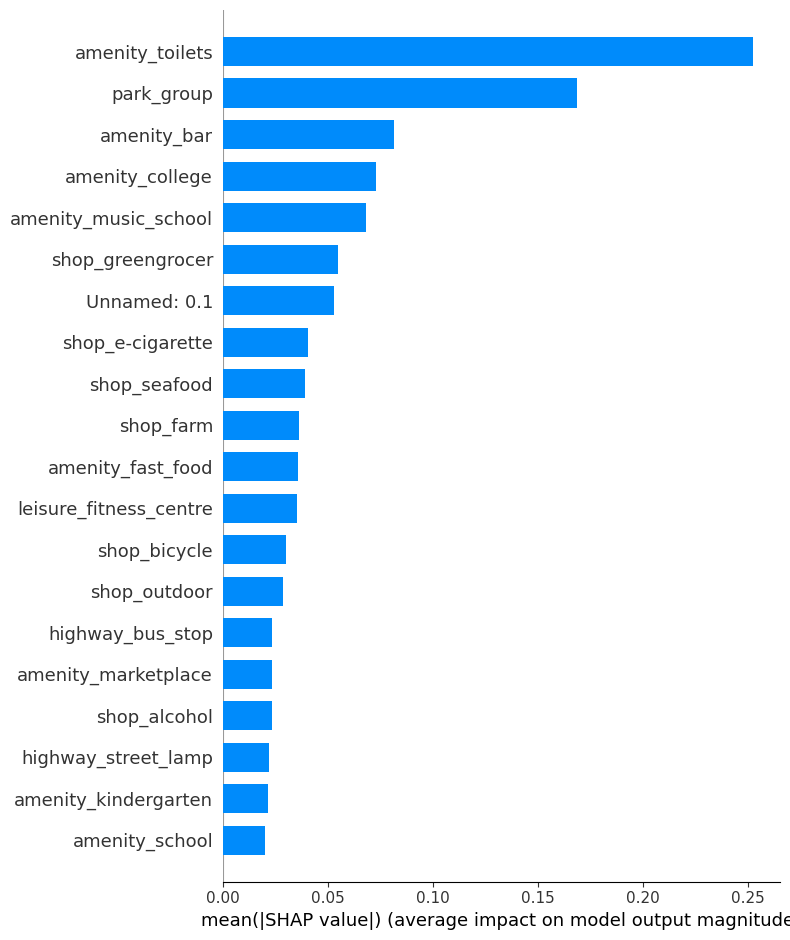

In [93]:
import shap

# Инициализируйте объект explainer
explainer = shap.Explainer(model)

# Вычислите значения SHAP для набора данных
shap_values = explainer(X)

# Визуализируйте значимость признаков для всего набора данных
shap.summary_plot(shap_values, X, plot_type="bar")

# Если хотите посмотреть на вклад каждого признака для конкретного наблюдения, можно использовать следующий код:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


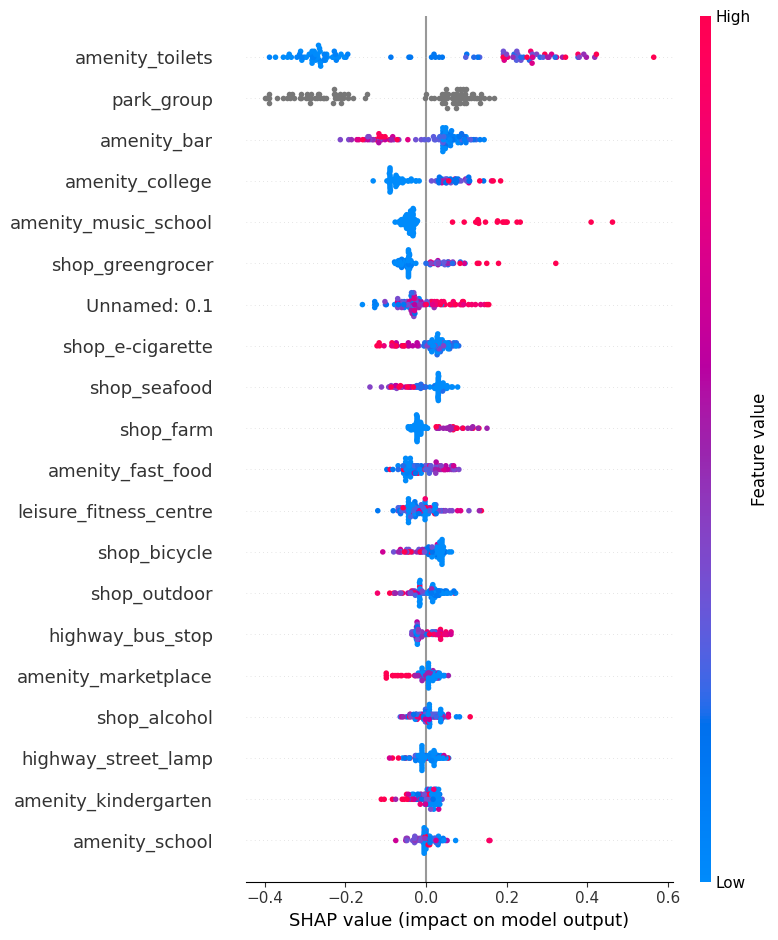

In [94]:
import shap
import catboost

# Ваш код для подготовки данных и обучения модели (model2)

# Используйте TreeExplainer для объяснения предсказаний модели
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X)

# Визуализируйте значимость признаков для всего набора данных
shap.summary_plot(shap_values, X)


In [101]:
import shap

# Используйте TreeExplainer для объяснения предсказаний модели
tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X)
base_values = tree_explainer.expected_value

shap.initjs()

# Перебор каждой строки и сохранение force_plot
for i in range(1,65):
    shap.force_plot(
        base_value=base_values,
        shap_values=shap_values[i],
        features=X.iloc[i],
        show=False,
        matplotlib=True
    )
    filepath = f"shap/{i+100}.html"
    shap.save_html(filepath, shap.force_plot(base_value=base_values, shap_values=shap_values[i], features=X.iloc[i], show=False))


In [13]:
shap.save_html("shap_plot.html", shap.force_plot(base_value=base_values, shap_values=shap_values[i], features=X.iloc[i]))
